In [50]:
import numpy as np # Biblioteca para manipulação de matrizes
import pandas as pd # Biblioteca para manipulação de datasets
import statistics as stats # Biblioteca para aplicação de funções estatísticas
import cv2 # Biblioteca para visão computacional
import os # Biblioteca do Sistema Operacional
import matplotlib.pyplot as plt # Biblioteca para visualização de dados
import seaborn as sns # Biblioteca para visualização de dados
import plotly as py # Biblioteca para visualização de dados
import plotly.graph_objs as go # Biblioteca para visualização de dados
from sklearn.decomposition import PCA # Principal Component Analysis (PCA)
from sklearn.preprocessing import StandardScaler # Normalização

% matplotlib inline

In [2]:
data_folder_path  = '/content/drive/My Drive/Colab Notebooks/TCC/PH2/Datafeature/'
full_data = pd.read_csv(data_folder_path + 'Full_Data_PH2.csv')
full_data = full_data.drop(['Unnamed: 0'],axis=1)
full_data.head(10)

,img_id,asymmetry,pigment_net,dots_glob,streaks,regressionA,blue_whit,Color_W,Color_R,Color_L_B,Color_D_B,Color_B_G,Color_B,shape,media_red,media_blue,media_green,var_red,var_blue,var_green,desvio_red,desvio_blue,desvio_green,media_gray,var_gray,desvio_gray,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs,Class,histo_diagnosis,Common_Nevus,Atypical_Nevus,Melanoma
0,IMD003,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,0,1,0,0,"(574, 765, 3)",141.026145,99.907090,95.599948,666.953403,526.671174,475.742898,25.825441,22.949317,21.811531,111.711304,553.885918,23.534781,144,49483.5,909.335130,908,534,11958.897376,0.335784,Common Nevus,0,1,0,0
1,IMD009,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,0,0,0,"(575, 766, 3)",174.015069,116.736129,81.192699,507.475204,485.590659,389.228814,22.527210,22.036122,19.728883,129.811612,472.564043,21.738538,133,49747.0,839.577770,78,896,12413.876730,0.175739,Common Nevus,0,1,0,0
2,IMD016,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,1,1,0,0,"(573, 765, 3)",170.306554,91.814428,53.234401,603.945814,435.521765,312.165444,24.575309,20.869158,17.668204,110.887407,453.007733,21.283978,181,73324.5,1089.442777,1654,2458,14639.691990,0.312090,Common Nevus,0,1,0,0
3,IMD022,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,0,0,0,"(573, 765, 3)",179.164652,99.801229,38.776840,639.835942,563.726585,352.307700,25.294979,23.742927,18.769861,116.574021,546.422459,23.375681,236,119377.5,1592.971778,719,325,18317.579080,0.380035,Common Nevus,0,1,0,0
4,IMD024,Simétrico,Típico,Ausente,Ausente,Ausente,Ausente,0,0,1,1,0,0,"(573, 765, 3)",165.550278,110.724523,76.140293,1322.465507,1041.601709,701.075468,36.365719,32.273855,26.477830,123.175569,1066.169505,32.652251,153,36656.5,792.707712,406,530,10083.023408,0.498939,Common Nevus,0,1,0,0
5,IMD025,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,1,0,0,0,"(577, 769, 3)",132.095231,85.111269,60.056989,430.852374,363.139929,292.679214,20.756984,19.056231,17.107870,96.303927,366.199870,19.136349,204,77347.5,1270.947386,1960,2056,14770.609200,0.452339,Common Nevus,0,1,0,0
6,IMD035,Totalmente A.,Típico,Ausente,Ausente,Ausente,Ausente,0,1,1,0,0,0,"(575, 766, 3)",239.027988,152.722725,103.764815,55.156649,240.294344,547.892719,7.426752,15.501430,23.407108,172.949387,150.549030,12.269842,214,64301.5,1336.898619,1255,2531,10864.425388,0.725452,Common Nevus,0,1,0,0
7,IMD038,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,0,1,0,1,"(575, 764, 3)",143.498717,81.054603,57.427817,1487.608122,536.171435,241.246363,38.569523,23.155376,15.532107,97.030848,685.610098,26.184157,157,45995.0,934.288447,89,419,11384.350915,0.439568,Common Nevus,0,1,0,0
8,IMD042,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,1,1,0,0,"(572, 765, 3)",124.813663,71.312369,45.354395,1113.957741,461.137617,185.632448,33.376005,21.474115,13.624700,84.351543,558.787172,23.638680,207,109522.5,1424.746378,81,565,17992.978771,0.254526,Common Nevus,0,1,0,0
9,IMD044,Simétrico,Típico,Típico,Ausente,Ausente,Ausente,0,0,0,1,1,0,"(574, 761, 3)",130.966066,88.625485,61.509271,525.031774,371.135212,256.602808,22.913572,19.264870,16.018827,98.195190,387.406880,19.682654,348,202438.0,1952.552512,3143,3141,23856.121476,0.482954,Common Nevus,0,1,0,0


Atypical Nevus    80
Common Nevus      80
Melanoma          40
Name: Class, dtype: int64

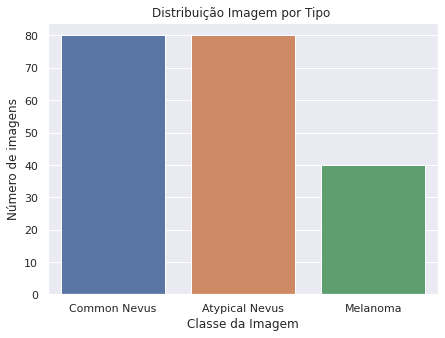

In [3]:
# Configuração de Plotagem
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plot = sns.countplot(x = 'Class',data = full_data)
plt.title('Distribuição Imagem por Tipo ')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Classe da Imagem")

full_data['Class'].value_counts()

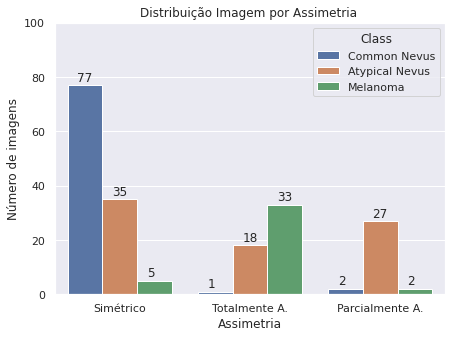

In [4]:
# Configuração de Plotagem
plt.figure(figsize=(7,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plot = sns.countplot(x="asymmetry", hue="Class", data=full_data)
plt.title('Distribuição Imagem por Assimetria ')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plt.ylim((0,100))
plot.set_xlabel("Assimetria")

total = 200
for p in plot.patches:
  percentage = '{}'.format( p.get_height())
  x = p.get_x() + 0.075
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))


In [5]:
valor1 = full_data[full_data.Class == 'Melanoma'][full_data.asymmetry == 'Simétrico']['asymmetry'].value_counts().sum()
valor2 = full_data[full_data.Class == 'Melanoma'][full_data.asymmetry == 'Parcialmente A.']['asymmetry'].value_counts().sum()
valor3 = full_data[full_data.Class == 'Melanoma'][full_data.asymmetry == 'Totalmente A.']['asymmetry'].value_counts().sum()
labels = [' Simétrico', 'Parcialmente Assimétrico',' Totalmente Assimétrico']
values = [valor1,valor2,valor3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição dos casos Melanoma quanto a Assimetria')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



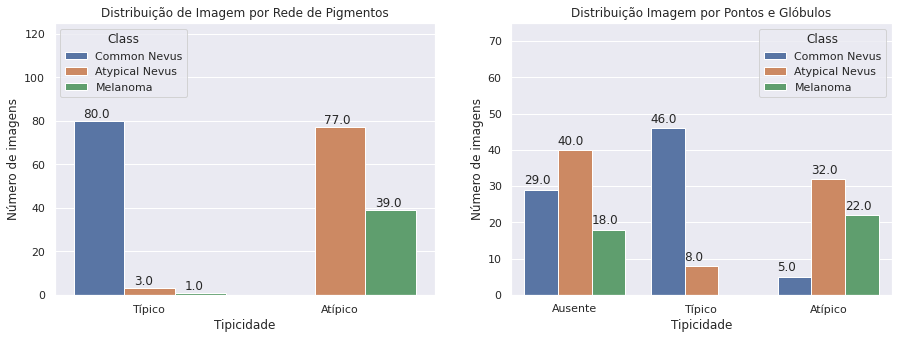

In [6]:
# Configuração do Plot
plt.figure(figsize=(15,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 2, 1)
plot = sns.countplot(x="pigment_net", hue="Class", data=full_data)
plt.title('Distribuição de Imagem por Rede de Pigmentos')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Tipicidade")
plt.ylim((0,125))
total = 200
for p in plot.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + 0.05
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))

# Visualização dos dados
plt.subplot(1, 2, 2)
plot = sns.countplot(x="dots_glob", hue="Class", data=full_data)
plt.title('Distribuição Imagem por Pontos e Glóbulos')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Tipicidade")
plt.ylim((0,75))
total = 200
for p in plot.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x()
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))




In [7]:
valor1 = full_data[full_data.Class == 'Melanoma'][full_data.pigment_net == 'Típico']['pigment_net'].value_counts().sum()
valor2 = full_data[full_data.Class == 'Melanoma'][full_data.pigment_net == 'Atípico']['pigment_net'].value_counts().sum()
labels = ['Típico', 'Atípico']
values = [valor1,valor2]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição dos casos Melanoma quanto a Rede de Pigmentos')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [8]:
valor1 = full_data[full_data.Class == 'Melanoma'][full_data.dots_glob == 'Ausente']['dots_glob'].value_counts().sum()
valor2 = full_data[full_data.Class == 'Melanoma'][full_data.dots_glob == 'Típico']['dots_glob'].value_counts().sum()
valor3 = full_data[full_data.Class == 'Melanoma'][full_data.dots_glob == 'Atípico']['dots_glob'].value_counts().sum()
labels = ['Ausente', 'Típico','Atípico']
values = [valor1,valor2,valor3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição dos casos Melanoma quanto por Pontos e Glóbulos')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



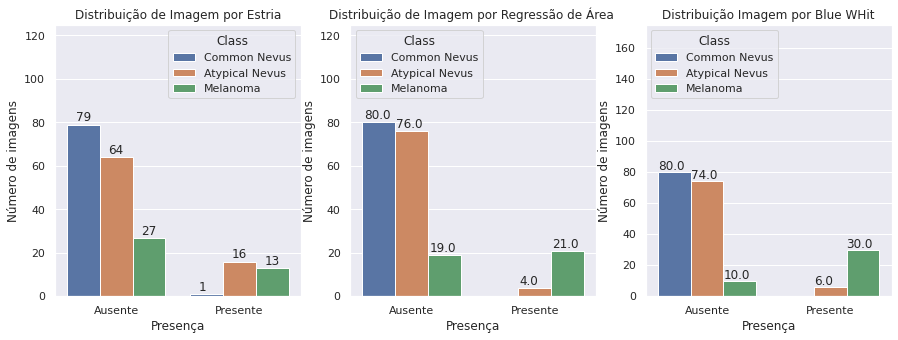

In [9]:
# Configuração do Plot
plt.figure(figsize=(15,5))
sns.set(font_scale=1.0)

# pigment_net	dots_glob	streaks	regressionA	blue_whit	Color_W	Color_R	Color_L_B	Color_D_B	Color_B_G	Color_B
# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.countplot(x="streaks", hue="Class", data=full_data)
plt.title('Distribuição de Imagem por Estria')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Presença")
plt.ylim((0,125))
total = 200
for p in plot.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + 0.07
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.countplot(x="regressionA", hue="Class", data=full_data)
plt.title('Distribuição de Imagem por Regressão de Área ')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Presença")
plt.ylim((0,125))
total = 200
for p in plot.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x() + 0.01
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))

  # Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.countplot(x="blue_whit", hue="Class", data=full_data)
plt.title('Distribuição Imagem por Blue WHit')
plt.ylabel('Número de imagens') # Pode ser ajustado usando fontsize = Núm
plot.set_xlabel("Presença")
plt.ylim((0,175))
total = 200
for p in plot.patches:
  percentage = '{}'.format(p.get_height())
  x = p.get_x()
  y = p.get_y() + p.get_height() + 1.5
  plot.annotate(percentage, (x, y))

In [10]:
valor1 = full_data[full_data.Class == 'Melanoma'][full_data.streaks == 'Ausente']['streaks'].value_counts().sum()
valor2 = full_data[full_data.Class == 'Melanoma'][full_data.streaks == 'Presente']['streaks'].value_counts().sum()
labels = ['Ausente', 'Presente']
values = [valor1,valor2,valor3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição dos casos Melanoma por Estrias')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [11]:
valor1 = full_data[full_data.Class == 'Melanoma'][full_data.regressionA == 'Ausente']['regressionA'].value_counts().sum()
valor2 = full_data[full_data.Class == 'Melanoma'][full_data.regressionA == 'Presente']['regressionA'].value_counts().sum()
labels = ['Ausente', 'Presente']
values = [valor1,valor2,valor3]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Distribuição dos casos Melanoma por Regressão de Área')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [12]:
full = full_data[['media_red', 'media_blue',
       'media_green', 'var_red', 'var_blue', 'var_green', 'desvio_red',
       'desvio_blue', 'desvio_green', 'media_gray', 'var_gray', 'desvio_gray','raio', 'area', 'perimetro', 'asymetriX', 
       'asymetriY','difarea',	'ampabs','Class']]
geome = full_data[['raio', 'area', 'perimetro', 'asymetriX', 'asymetriY','difarea',	'ampabs', 'Class']]
colorMed = full_data[['media_red', 'media_blue','media_green','Class']]
colorVar = full_data[['var_red', 'var_blue', 'var_green','Class']]
colorDes = full_data[['desvio_red','desvio_blue', 'desvio_green','Class']]
colorRed = full_data[['media_red', 'var_red', 'desvio_red', 'Class']]
colorBlu = full_data[['media_blue', 'var_blue', 'desvio_blue', 'Class']]
colorGre = full_data[['media_green', 'var_green', 'desvio_green', 'Class']]
colorGra = full_data[['media_gray', 'var_gray', 'desvio_gray', 'Class']]

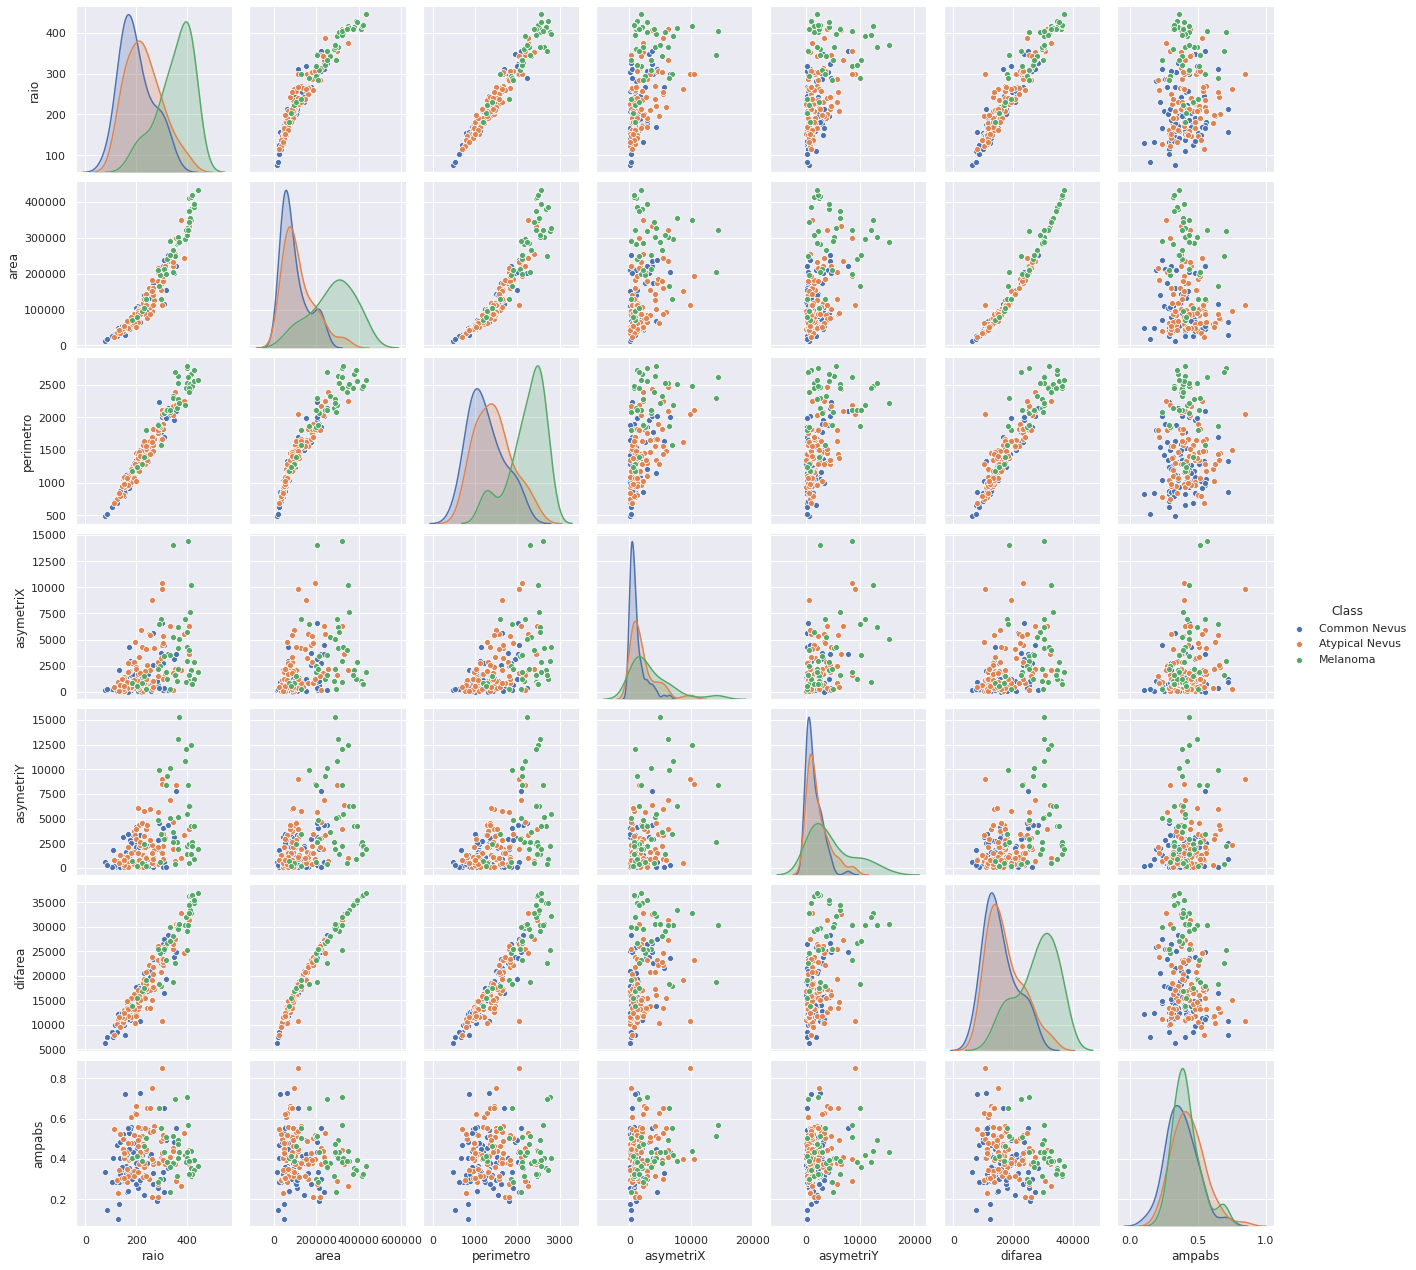

In [13]:
g = sns.pairplot(geome, hue="Class")


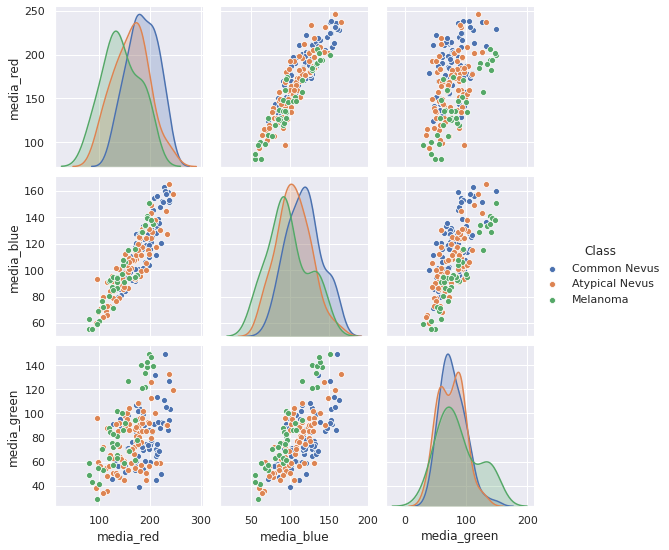

In [14]:
sns.pairplot(colorMed, hue="Class")

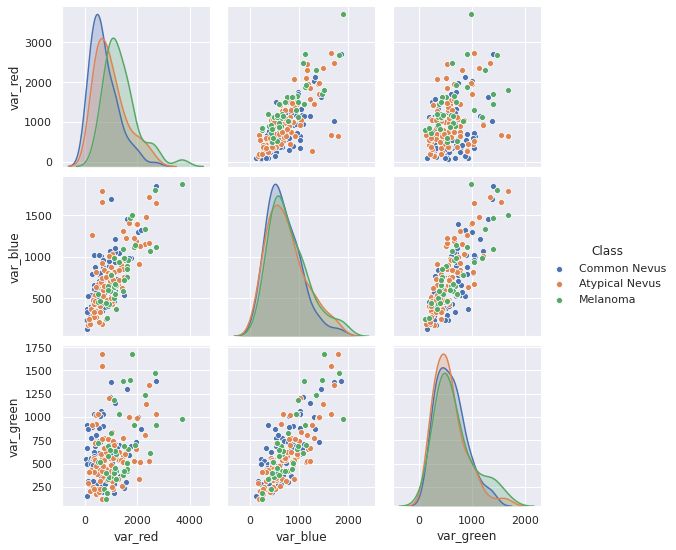

In [15]:
sns.pairplot(colorVar, hue="Class")

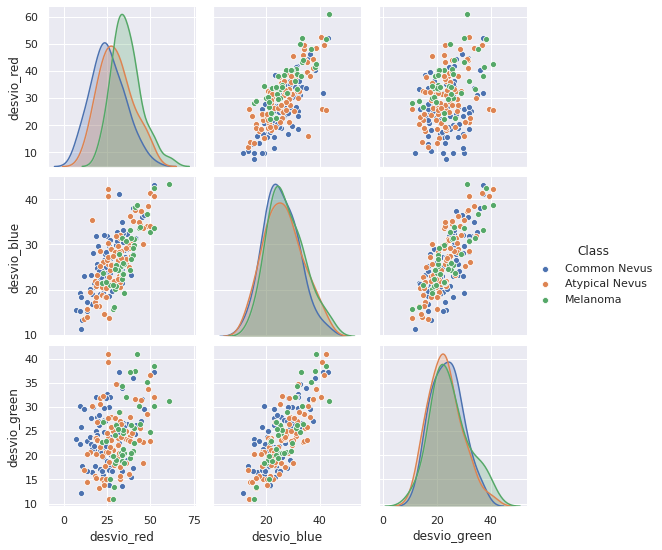

In [16]:
sns.pairplot(colorDes, hue="Class")

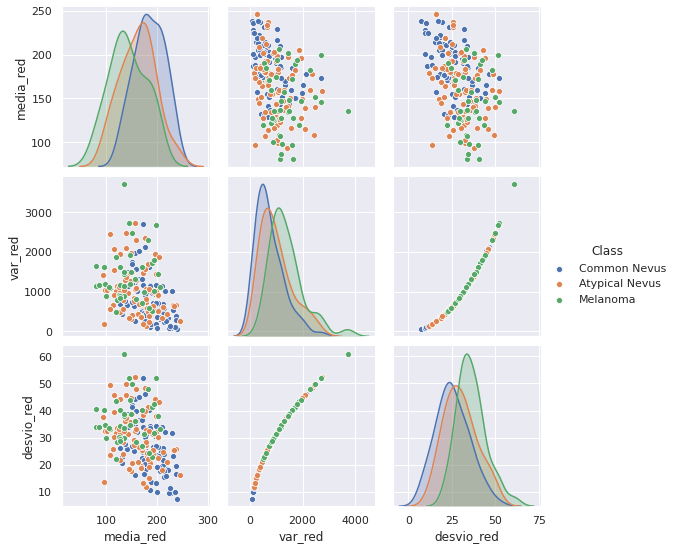

In [17]:
sns.pairplot(colorRed, hue="Class")

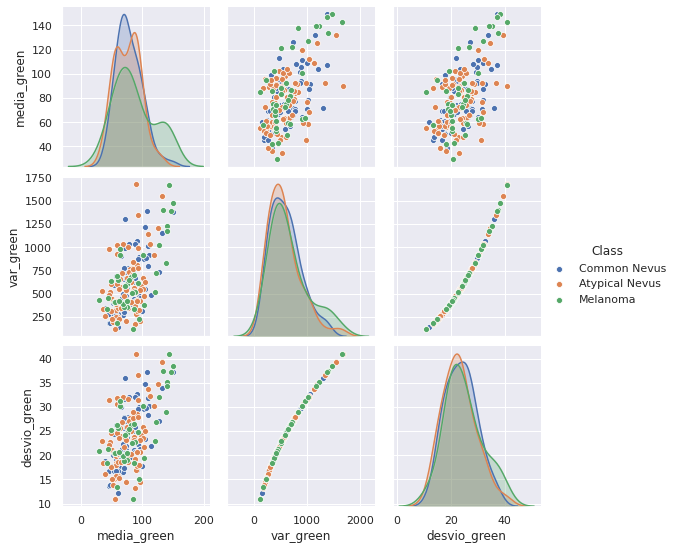

In [18]:
sns.pairplot(colorGre, hue="Class")

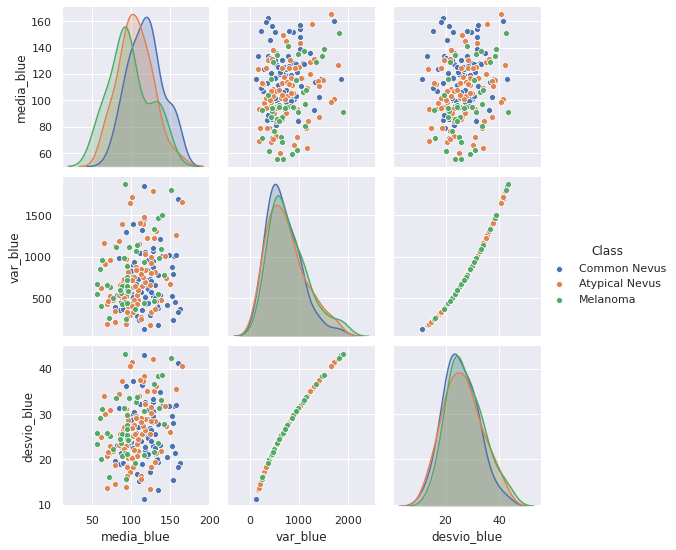

In [19]:
sns.pairplot(colorBlu, hue="Class")

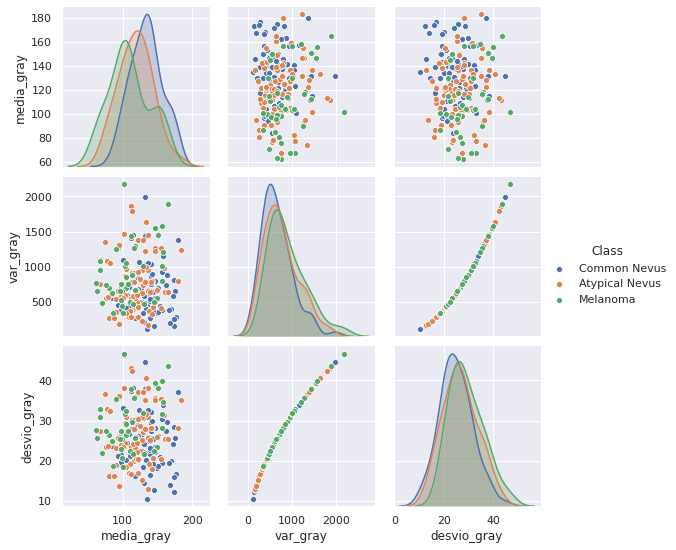

In [20]:
sns.pairplot(colorGra, hue="Class")

In [21]:
sns.pairplot(full, hue="Class")

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 0, 'Classe')

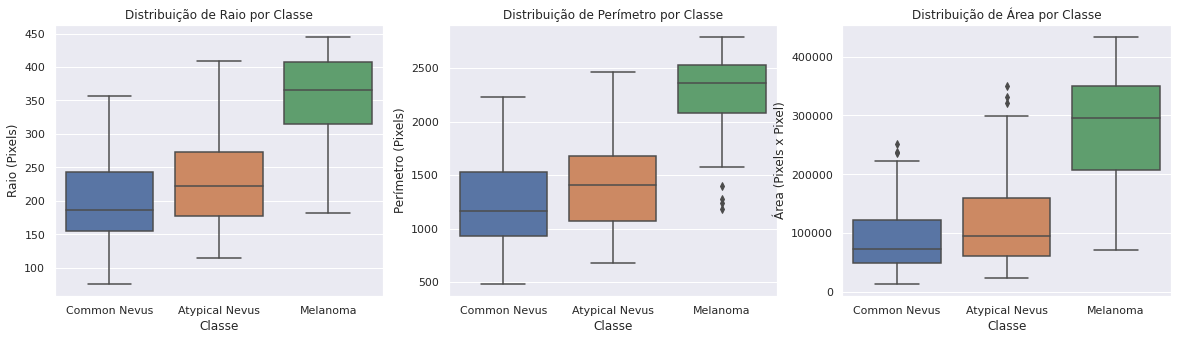

In [22]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.boxplot(x="Class", y="raio", data=full_data)
plt.title('Distribuição de Raio por Classe')
plt.ylabel('Raio (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.boxplot(x="Class", y="perimetro", data=full_data)
plt.title('Distribuição de Perímetro por Classe')
plt.ylabel('Perímetro (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.boxplot(x="Class", y="area", data=full_data)
plt.title('Distribuição de Área por Classe')
plt.ylabel('Área (Pixels x Pixel)')
plot.set_xlabel("Classe")




Text(0.5, 0, 'Classe')

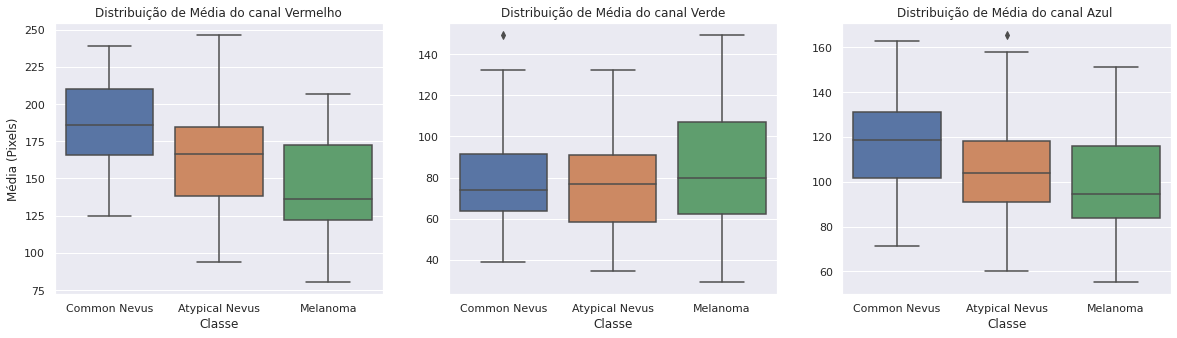

In [23]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.boxplot(x="Class", y="media_red", data=full_data)
plt.title('Distribuição de Média do canal Vermelho')
plt.ylabel('Média (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.boxplot(x="Class", y="media_green", data=full_data)
plt.title('Distribuição de Média do canal Verde')
plt.ylabel('')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.boxplot(x="Class", y="media_blue", data=full_data)
plt.title('Distribuição de Média do canal Azul ')
plt.ylabel('')
plot.set_xlabel("Classe")

Text(0.5, 0, 'Classe')

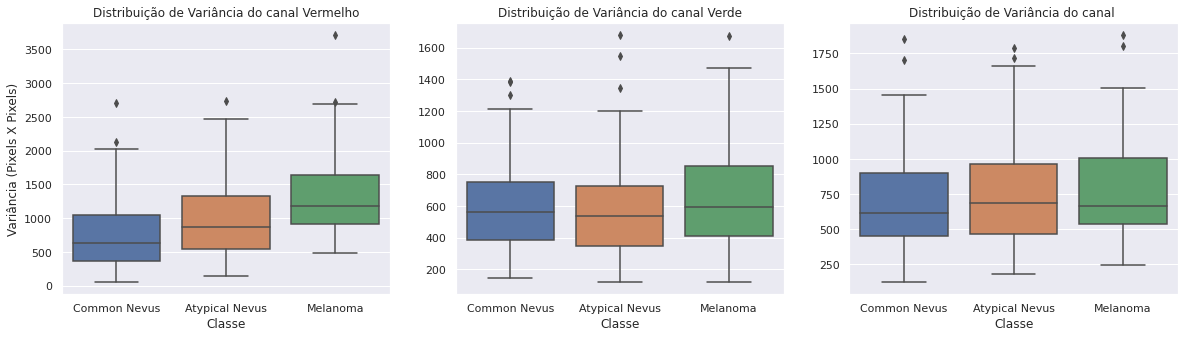

In [24]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.boxplot(x="Class", y="var_red", data=full_data)
plt.title('Distribuição de Variância do canal Vermelho')
plt.ylabel('Variância (Pixels X Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.boxplot(x="Class", y="var_green", data=full_data)
plt.title('Distribuição de Variância do canal Verde')
plt.ylabel('')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.boxplot(x="Class", y="var_blue", data=full_data)
plt.title('Distribuição de Variância do canal ')
plt.ylabel('')
plot.set_xlabel("Classe")

Text(0.5, 0, 'Classe')

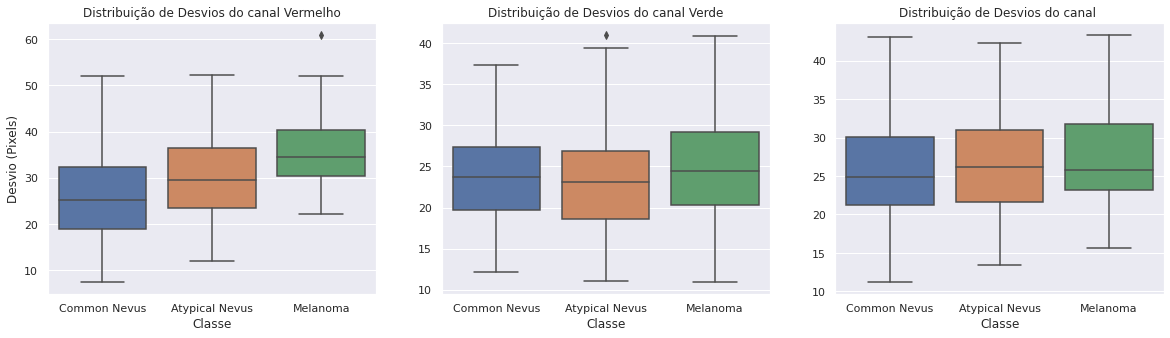

In [25]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.boxplot(x="Class", y="desvio_red", data=full_data)
plt.title('Distribuição de Desvios do canal Vermelho')
plt.ylabel('Desvio (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.boxplot(x="Class", y="desvio_green", data=full_data)
plt.title('Distribuição de Desvios do canal Verde')
plt.ylabel('')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.boxplot(x="Class", y="desvio_blue", data=full_data)
plt.title('Distribuição de Desvios do canal ')
plt.ylabel('')
plot.set_xlabel("Classe")

Text(0.5, 0, 'Classe')

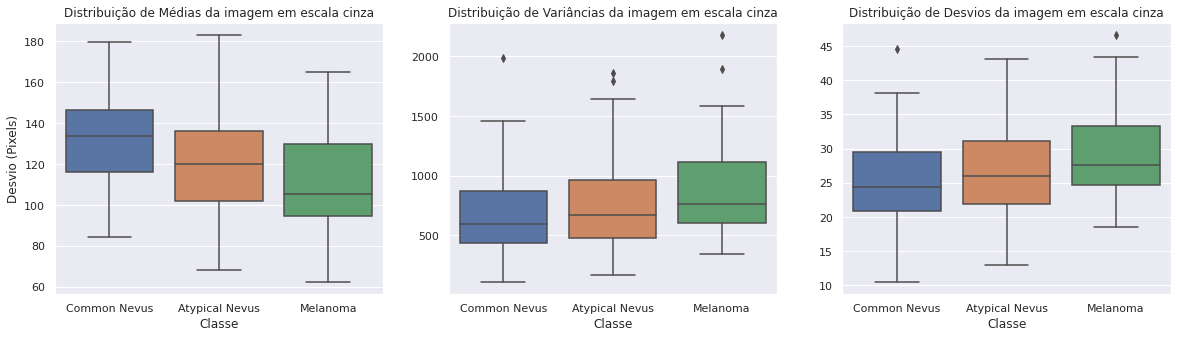

In [26]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 3, 1)
plot = sns.boxplot(x="Class", y="media_gray", data=full_data)
plt.title('Distribuição de Médias da imagem em escala cinza')
plt.ylabel('Desvio (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 2)
plot = sns.boxplot(x="Class", y="var_gray", data=full_data)
plt.title('Distribuição de Variâncias da imagem em escala cinza')
plt.ylabel('')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 3, 3)
plot = sns.boxplot(x="Class", y="desvio_gray", data=full_data)
plt.title('Distribuição de Desvios da imagem em escala cinza')
plt.ylabel('')
plot.set_xlabel("Classe")

Text(0.5, 0, 'Classe')

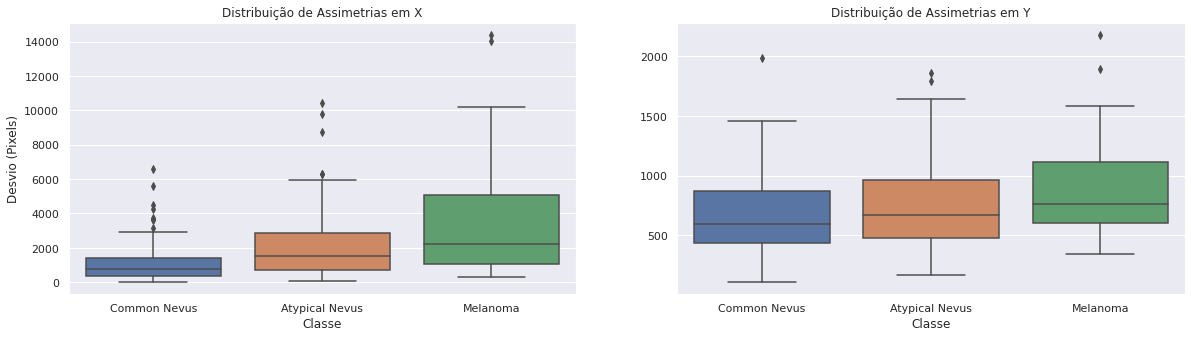

In [27]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 2, 1)
plot = sns.boxplot(x="Class", y="asymetriX", data=full_data)
plt.title('Distribuição de Assimetrias em X')
plt.ylabel('Desvio (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 2, 2)
plot = sns.boxplot(x="Class", y="var_gray", data=full_data)
plt.title('Distribuição de Assimetrias em Y')
plt.ylabel('')
plot.set_xlabel("Classe")

Text(0.5, 0, 'Classe')

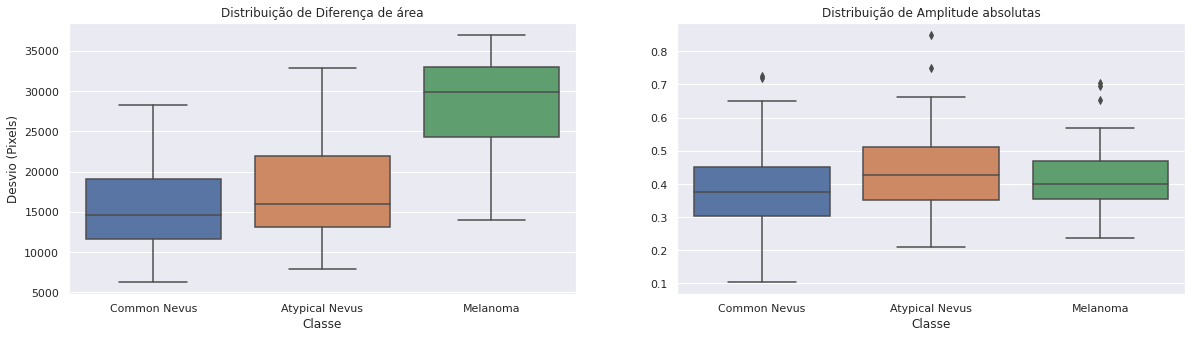

In [28]:
# Configuração do Plot
plt.figure(figsize=(20,5))
sns.set(font_scale=1.0)

# Visualização dos dados
plt.subplot(1, 2, 1)
plot = sns.boxplot(x="Class", y="difarea", data=full_data)
plt.title('Distribuição de Diferença de área')
plt.ylabel('Desvio (Pixels)')
plot.set_xlabel("Classe")

# Visualização dos dados
plt.subplot(1, 2, 2)
plot = sns.boxplot(x="Class", y="ampabs", data=full_data)
plt.title('Distribuição de Amplitude absolutas')
plt.ylabel('')
plot.set_xlabel("Classe")	

In [32]:
full_data.columns

Index(['img_id', 'asymmetry', 'pigment_net', 'dots_glob', 'streaks',
       'regressionA', 'blue_whit', 'Color_W', 'Color_R', 'Color_L_B',
       'Color_D_B', 'Color_B_G', 'Color_B', 'shape', 'media_red', 'media_blue',
       'media_green', 'var_red', 'var_blue', 'var_green', 'desvio_red',
       'desvio_blue', 'desvio_green', 'media_gray', 'var_gray', 'desvio_gray',
       'raio', 'area', 'perimetro', 'asymetriX', 'asymetriY', 'difarea',
       'ampabs', 'Class', 'histo_diagnosis', 'Common_Nevus', 'Atypical_Nevus',
       'Melanoma'],
      dtype='object')

In [63]:
X = full_data[['media_red', 'media_blue',
       'media_green', 'var_red', 'var_blue', 'var_green', 'desvio_red',
       'desvio_blue', 'desvio_green', 'media_gray', 'var_gray', 'desvio_gray',
       'raio', 'area', 'perimetro', 'asymetriX', 'asymetriY', 'difarea',
       'ampabs']]
X

,media_red,media_blue,media_green,var_red,var_blue,var_green,desvio_red,desvio_blue,desvio_green,media_gray,var_gray,desvio_gray,raio,area,perimetro,asymetriX,asymetriY,difarea,ampabs
0,141.026145,99.907090,95.599948,666.953403,526.671174,475.742898,25.825441,22.949317,21.811531,111.711304,553.885918,23.534781,144,49483.5,909.335130,908,534,11958.897376,0.335784
1,174.015069,116.736129,81.192699,507.475204,485.590659,389.228814,22.527210,22.036122,19.728883,129.811612,472.564043,21.738538,133,49747.0,839.577770,78,896,12413.876730,0.175739
2,170.306554,91.814428,53.234401,603.945814,435.521765,312.165444,24.575309,20.869158,17.668204,110.887407,453.007733,21.283978,181,73324.5,1089.442777,1654,2458,14639.691990,0.312090
3,179.164652,99.801229,38.776840,639.835942,563.726585,352.307700,25.294979,23.742927,18.769861,116.574021,546.422459,23.375681,236,119377.5,1592.971778,719,325,18317.579080,0.380035
4,165.550278,110.724523,76.140293,1322.465507,1041.601709,701.075468,36.365719,32.273855,26.477830,123.175569,1066.169505,32.652251,153,36656.5,792.707712,406,530,10083.023408,0.498939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,199.091937,150.993300,149.435851,2689.025954,1804.435408,1473.571693,51.855819,42.478646,38.387129,165.207616,1891.547134,43.491920,445,433650.5,2567.428494,1888,1950,36974.030758,0.363643
196,193.895343,139.192590,142.878325,1799.130083,1501.292810,1672.646213,42.416154,38.746520,40.897998,155.990906,1580.467756,39.755097,408,373804.5,2448.506702,1583,6239,34352.053921,0.324069
197,184.380854,128.757984,121.296540,596.840160,472.215167,522.314070,24.430312,21.730512,22.854192,144.552509,498.227858,22.321018,332,253084.0,2110.528122,3542,10172,27168.462972,0.359577
198,135.859711,93.886946,74.522794,1494.822367,716.885681,417.869572,38.662933,26.774721,20.441858,104.241915,849.345045,29.143525,203,79175.5,1244.413335,566,250,15445.486172,0.412665


In [62]:
scaler = StandardScaler()
scaler.fit(X)


ValueError: ignored

In [64]:
Y =scaler.transform(X)

NotFittedError: ignored

In [44]:
pca = PCA(n_components=2)

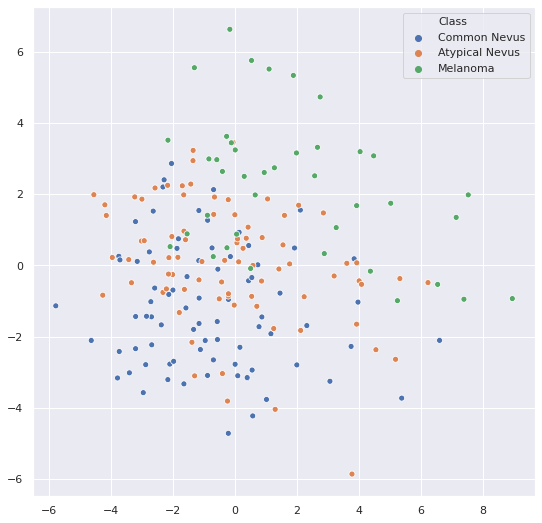

In [60]:

plt.figure(figsize=(9, 9))
sns.scatterplot(x=pca.fit_transform(Y)[:, 0], y=pca.fit_transform(Y)[:, 1], hue=full_data['Class'])
plt.show()

In [41]:
sns.scatterplot(x=pca.fit_transform(X)[:, 0], y=pca.fit_transform(X)[:, 1], hue=full_data[['Class']])

ValueError: ignored

In [ ]:
sns.scatter(  ,data = X)

In [29]:
correlacao = pd.DataFrame(full_data.corr())

nivel = 0.25

relevancia_corr = pd.DataFrame(correlacao['Melanoma'].loc[(correlacao['Melanoma']>=nivel ) | (correlacao['Melanoma']<=-nivel)])


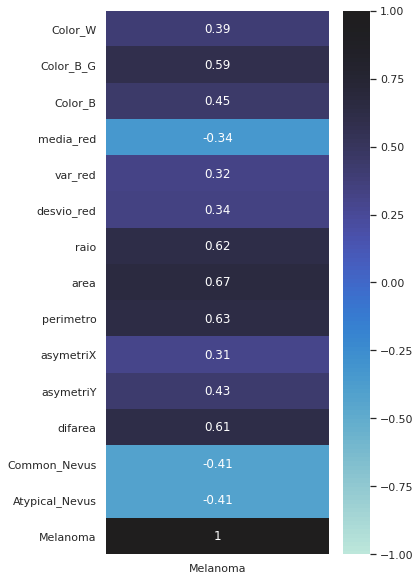

In [30]:
f, ax = plt.subplots(figsize=(5, 10))
sns.set(style="ticks")
sns.set(font_scale=1)
sns.heatmap(relevancia_corr,vmin=-1, vmax=1,center=1,annot=True, ax=ax)

plt.savefig('corr_principais.png', format='png')

In [31]:
correlacao = pd.DataFrame(full_dataa.corr())
f, ax = plt.subplots(figsize=(15, 15))
sns.set(style="ticks")
sns.set(font_scale=0.5)
sns.heatmap(correlacao,vmin=-1, vmax=1,center=1,annot=True, ax=ax)

plt.savefig('corr_principais.png', format='png')

NameError: ignored